In [141]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [142]:
hltv_information = "hltv_information.csv"
demo_information = "demo_information.csv"

In [143]:
hltv_df = pd.read_csv(hltv_information, delimiter=";", header=[0])
hltv_df["teamName"].unique()

array(['Heroic', 'Astralis', 'Copenhagen Flames', 'SKADE', 'Vitality',
       'ENCE', 'fnatic', 'FaZe', 'FURIA', 'Outsiders', 'K23', 'G2', 'NIP',
       'Entropiq', 'MOUZ', 'Natus Vincere', 'Gambit', 'Virtus.pro', 'OG',
       'BIG', 'Eternal Fire', 'ECSTATIC', 'Liquid', 'Movistar Riders',
       'Fiend', 'Lyngby Vikings', 'Spirit', 'Complexity', 'forZe',
       'SINNERS', 'Akuma', 'FunPlus Phoenix', 'Extra Salt', 'HAVU',
       'Evil Geniuses', 'Cloud9'], dtype=object)

In [144]:
demo_df = pd.read_csv(demo_information, delimiter=";", header=[0])
demo_df["team0_name"].unique()

array(['Natus Vincere', 'fnatic', 'G2', 'Astralis', 'Spirit',
       'Virtus.pro', 'FaZe', 'BIG', 'FunPlus Phoenix', 'FURIA', 'ENCE',
       'Vitality', 'Liquid', 'Entropiq', 'Heroic', 'Gambit', 'Extra Salt',
       'Complexity', 'NIP', 'HAVU', 'OG', 'MOUZ', 'SINNERS',
       'Evil Geniuses', 'Fiend', 'Copenhagen Flames', 'forZe', 'Akuma',
       'K23', 'ECSTATIC', 'Lyngby Vikings', 'Cloud9', 'Outsiders',
       'Movistar Riders', 'Eternal Fire', 'SKADE'], dtype=object)

In [145]:
def getTeamXStats(team):
    def remap(column_name):
        return column_name.removeprefix(team)

    cols = pd.Series(demo_df.columns)
    columns = demo_df.columns[(cols.str.startswith(team))].append(pd.Index(["id", "mapName"]))
    a = demo_df[columns].rename(mapper=remap, axis=1).set_index(["id", "name", "mapName"])
    return a
    
t0 = getTeamXStats("team0_")
t1 = getTeamXStats("team1_")
concated = pd.concat([t0, t1])
concated[:10]

,,,player2_refrags,player4_refrags,player0_refrags,player3_refrags,player1_refrags,roundsWon,player2_flashAssists,player1_flashAssists,player1_clutchIndex,player2_clutchIndex,...,player3_flashes,player4_flashes,player0_flashes,player1_flashes,player4_clutchIndex,player3_flashAssists,player0_flashAssists,player4_flashAssists,opponentEcoRoundsLost,ecoRoundsWon
id,name,mapName,,,,,,,,,,,,,,,,,,,,,
69468,Natus Vincere,de_nuke,6.0,1.0,2.0,4.0,7.0,16.0,3.0,1.0,2.0,0.0,...,16.0,19.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
70153,fnatic,de_inferno,4.0,3.0,3.0,1.0,6.0,11.0,7.0,1.0,0.0,0.0,...,12.0,11.0,6.0,5.0,0.0,3.0,1.0,1.0,0.0,0.0
64099,G2,de_mirage,4.0,5.0,7.0,4.0,5.0,16.0,1.0,2.0,0.0,3.0,...,10.0,5.0,7.0,9.0,3.0,1.0,4.0,1.0,1.0,1.0
66259,Astralis,de_inferno,2.0,2.0,5.0,3.0,3.0,8.0,4.0,0.0,0.0,1.0,...,7.0,11.0,14.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0
68251,Spirit,de_dust2,7.0,4.0,3.0,0.0,4.0,8.0,1.0,2.0,0.0,0.0,...,9.0,9.0,11.0,15.0,0.0,0.0,1.0,2.0,1.0,0.0
67557,Virtus.pro,de_inferno,1.0,2.0,1.0,4.0,4.0,16.0,0.0,6.0,0.0,0.0,...,6.0,7.0,9.0,12.0,0.0,1.0,1.0,0.0,0.0,0.0
66500,FaZe,de_inferno,2.0,3.0,4.0,5.0,3.0,16.0,1.0,3.0,0.0,0.0,...,30.0,19.0,21.0,12.0,3.0,3.0,1.0,1.0,0.0,0.0
70085,BIG,de_vertigo,1.0,3.0,3.0,3.0,1.0,16.0,1.0,1.0,0.0,0.0,...,2.0,11.0,34.0,22.0,0.0,0.0,2.0,2.0,0.0,0.0
65208,BIG,de_dust2,2.0,7.0,1.0,5.0,5.0,2.0,3.0,2.0,0.0,0.0,...,8.0,12.0,5.0,21.0,0.0,3.0,3.0,0.0,0.0,0.0


In [146]:
indexed_hltv = hltv_df.rename(mapper={"teamName": "name"}, axis=1).set_index(["id", "name", "mapName"])
indexed_hltv[:10]

win           date  player0_kills  \
id    name              mapName                                          
71140 Heroic            de_ancient     0  1648735800000           22.0   
      Astralis          de_ancient     1  1648735800000           29.0   
      Heroic            de_overpass    1  1648735800000           36.0   
      Astralis          de_overpass    0  1648735800000           30.0   
      Heroic            de_vertigo     1  1648735800000           35.0   
      Astralis          de_vertigo     0  1648735800000           27.0   
71084 Copenhagen Flames de_overpass    0  1648573200000           16.0   
      SKADE             de_overpass    1  1648573200000           20.0   
      Copenhagen Flames de_nuke        0  1648573200000           18.0   
      SKADE             de_nuke        1  1648573200000           23.0   

                                     player0_deaths  player0_adr  \
id    name              mapName                                    
71140 Heroic            de_ancient             21.0         86.6   
      Astralis          de_ancient             22.0        112.5   
      Heroic            de_overpass            24.0        106.9   
      Astralis          de_overpass            31.0         92.6   
      Heroic            de_vertigo             21.0         94.3   
      Astralis          de_vertigo             26.0         86.5   
71084 Copenhagen Flames de_overpass            17.0         94.7   
      SKADE             de_overpass             7.0        103.0   
      Copenhagen Flames de_nuke                19.0         93.8   
      SKADE             de_nuke                 8.0        101.6   

                                     player0_kast  player0_rating20  \
id    name              mapName                                       
71140 Heroic            de_ancient           78.6              1.14   
      Astralis          de_ancient           75.0              1.47   
      Heroic            de_overpass          85.7              1.65   
      Astralis          de_overpass          71.4              1.13   
      Heroic            de_vertigo           80.5              1.45   
      Astralis          de_vertigo           70.7              1.16   
71084 Copenhagen Flames de_overpass          70.0              0.99   
      SKADE             de_overpass          90.0              1.84   
      Copenhagen Flames de_nuke              50.0              1.03   
      SKADE             de_nuke              95.5              1.86   

                                     player1_kills  player1_deaths  \
id    name              mapName                                      
71140 Heroic            de_ancient            20.0            21.0   
      Astralis          de_ancient            19.0            18.0   
      Heroic            de_overpass           36.0            21.0   
      Astralis          de_overpass           26.0            26.0   
      Heroic            de_vertigo            37.0            26.0   
      Astralis          de_vertigo            26.0            30.0   
71084 Copenhagen Flames de_overpass           12.0            16.0   
      SKADE             de_overpass           20.0            11.0   
      Copenhagen Flames de_nuke               16.0            18.0   
      SKADE             de_nuke               22.0             8.0   

                                     player1_adr  ...  player3_kills  \
id    name              mapName                   ...                  
71140 Heroic            de_ancient          80.4  ...           15.0   
      Astralis          de_ancient          87.1  ...           23.0   
      Heroic            de_overpass        103.5  ...           18.0   
      Astralis          de_overpass         97.9  ...           22.0   
      Heroic            de_vertigo          99.3  ...           27.0   
      Astralis          de_vertigo          80.2  ...           23.0   
71084 Copenhagen Flames de_overpass         76.8  ...        

In [147]:
joint_df = indexed_hltv.join(concated)
joint_df["date"] = joint_df["date"] + range(0, len(joint_df))
joint_df[:10]

win           date  player0_kills  \
id    name          mapName                                          
61948 Astralis      de_inferno     0  1611070200000           18.0   
                    de_overpass    1  1611070200001           24.0   
                    de_vertigo     1  1611070200002           21.0   
      Evil Geniuses de_inferno     1  1611070200003           24.0   
                    de_overpass    0  1611070200004           13.0   
                    de_vertigo     0  1611070200005           15.0   
61956 FURIA         de_inferno     0  1611084300006           19.0   
                    de_mirage      1  1611084300007           26.0   
                    de_nuke        0  1611084300008           22.0   
      G2            de_inferno     1  1611084300009           25.0   

                                 player0_deaths  player0_adr  player0_kast  \
id    name          mapName                                                  
61948 Astralis      de_inferno             18.0         74.0          70.0   
                    de_overpass            12.0        111.0          83.3   
                    de_vertigo             14.0        107.1          81.8   
      Evil Geniuses de_inferno             14.0         89.3          80.0   
                    de_overpass            15.0         62.7          70.8   
                    de_vertigo             16.0         76.7          54.5   
61956 FURIA         de_inferno             18.0         79.4          60.7   
                    de_mirage              19.0        102.1          76.7   
                    de_nuke                15.0         99.0          76.9   
      G2            de_inferno             19.0        105.3          71.4   

                                 player0_rating20  player1_kills  \
id    name          mapName                                        
61948 Astralis      de_inferno               1.14           21.0   
                    de_overpass              1.65           21.0   
                    de_vertigo               1.57           21.0   
      Evil Geniuses de_inferno               1.40           24.0   
                    de_overpass              0.97           15.0   
                    de_vertigo               0.93           12.0   
61956 FURIA         de_inferno               1.13           19.0   
                    de_mirage                1.44           20.0   
                    de_nuke                  1.39           15.0   
      G2            de_inferno               1.33           22.0   

                                 player1_deaths  player1_adr  ...  \
id    name          mapName                                   ...   
61948 Astralis      de_inferno             20.0         79.5  ...   
                    de_overpass            10.0         86.4  ...   
                    de_vertigo             11.0         84.3  ...   
      Evil Geniuses de_inferno             18.0         79.6  ...   
                    de_overpass            17.0         65.3  ...   
                    de_vertigo             17.0         72.9  ...   
61956 FURIA         de_inferno             18.0         75.9  ...   
                    de_mirage              17.0         77.1  ...   
                    de_nuke                20.0         59.1  ...   
      G2            de_inferno             16.0         74.7  ...   

                                 player3_flashes  player4_flashes  \
id    name          mapName                                         
61948 Astralis      de_inferno              14.0             10.0   
                    de_overpass             30.0              6.0   
                    de_vertigo               5.0             23.0   
      Evil Geniuses de_inferno              30.0             24.0   
                    de_overpass             15.0              7.0   
                    de_vertigo              14.0             16.0   
61956 FURIA         de_inferno              24.0         

In [148]:
sorted = joint_df.reset_index().sort_values("date")
sorted = sorted.dropna()
players_features = sorted.filter(like="player0")
for feature in players_features:
    without_prefix = feature.removeprefix("player0")
    to_mean = [p + without_prefix for p in ["player0", "player1", "player2", "player3", "player4"]]
    sorted["mean" + without_prefix] = sorted[to_mean].mean(axis=1)
sorted[:30]

,id,name,mapName,win,date,player0_kills,player0_deaths,player0_adr,player0_kast,player0_rating20,...,mean_refrags,mean_clutchIndex,mean_savedMoney,mean_duelsWon,mean_entryFrags,mean_duelsWonWorse,mean_duelsWonBetter,mean_grenadeDamage,mean_flashes,mean_flashAssists
0,61948,Astralis,de_inferno,0,1611070200000,18.0,18.0,74.0,70.0,1.14,...,6.0,0.0,13610.0,0.410317,5.2,0.216667,0.900000,291.6,18.6,2.0
1,61948,Astralis,de_overpass,1,1611070200001,24.0,12.0,111.0,83.3,1.65,...,3.0,0.2,11150.0,0.649748,2.8,0.400000,0.760000,148.8,13.8,1.2
2,61948,Astralis,de_vertigo,1,1611070200002,21.0,14.0,107.1,81.8,1.57,...,2.2,0.4,4300.0,0.583590,3.4,0.100000,0.920000,172.6,14.6,1.4
3,61948,Evil Geniuses,de_inferno,1,1611070200003,24.0,14.0,89.3,80.0,1.40,...,7.0,1.4,19720.0,0.595172,5.0,0.100000,0.750000,133.8,29.2,3.0
4,61948,Evil Geniuses,de_overpass,0,1611070200004,13.0,15.0,62.7,70.8,0.97,...,2.6,0.4,19460.0,0.343590,2.0,0.200000,0.100000,32.6,9.6,1.8
5,61948,Evil Geniuses,de_vertigo,0,1611070200005,15.0,16.0,76.7,54.5,0.93,...,3.6,0.2,14560.0,0.440085,1.2,0.133333,0.550000,126.0,14.4,1.2
6,61956,FURIA,de_inferno,0,1611084300006,19.0,18.0,79.4,60.7,1.13,...,4.4,0.0,16210.0,0.406547,3.8,0.466667,0.580000,168.8,13.8,2.0
7,61956,FURIA,de_mirage,1,1611084300007,26.0,19.0,102.1,76.7,1.44,...,4.0,1.4,13930.0,0.484444,2.8,0.200000,0.493333,111.8,4.6,1.0
8,61956,FURIA,de_nuke,0,1611084300008,22.0,15.0,99.0,76.9,1.39,...,2.2,0.4,11710.0,0.427552,2.6,0.073333,0.700000,93.8,9.0,0.2
9,61956,G2,de_inferno,1,1611084300009,25.0,19.0,105.3,71.4,1.33,...,4.8,0.2,7760.0,0.576256,4.0,0.360000,0.583333,187.0,23.2,2.8


In [149]:
MATCHES_NUMBER = 5

def get_previous_matches(df, team_name, date):
    res = df.loc[(df["date"] < date) & (df["name"] == team_name)].sort_values("date").tail(MATCHES_NUMBER)
    return res
    
get_previous_matches(sorted, "Natus Vincere", 1631232200000)

,id,name,mapName,win,date,player0_kills,player0_deaths,player0_adr,player0_kast,player0_rating20,...,mean_refrags,mean_clutchIndex,mean_savedMoney,mean_duelsWon,mean_entryFrags,mean_duelsWonWorse,mean_duelsWonBetter,mean_grenadeDamage,mean_flashes,mean_flashAssists
1609,66531,Natus Vincere,de_mirage,1,1630166401609,28.0,17.0,98.8,76.0,1.61,...,2.6,0.8,4590.0,0.406277,3.0,0.000000,0.450000,84.8,8.2,1.4
1612,66556,Natus Vincere,de_dust2,0,1630236601612,22.0,18.0,78.6,77.8,1.13,...,2.8,0.2,13110.0,0.430159,2.2,0.166667,0.666667,89.2,10.0,1.6
1613,66556,Natus Vincere,de_mirage,0,1630236601613,21.0,18.0,93.3,65.2,1.33,...,3.4,0.6,12410.0,0.327451,2.0,0.283333,0.366667,74.6,8.8,0.2
1620,66613,Natus Vincere,de_inferno,1,1630432801620,19.0,7.0,85.7,91.3,1.49,...,2.2,0.2,14150.0,0.743333,2.6,1.000000,0.800000,228.2,16.0,1.6
1621,66613,Natus Vincere,de_nuke,1,1630432801621,34.0,20.0,99.3,80.6,1.47,...,3.6,1.6,12090.0,0.461111,4.8,0.213333,0.450000,93.8,10.6,1.6


In [150]:
def get_map_winratio(df, team_name, map_name, date):
    res = df.loc[(df["date"] < date) & (df["name"] == team_name) & (df["mapName"] == map_name)]
    value = res["win"].mean()
    if np.isnan(value):
        return 0.5
    else:
        return value

get_map_winratio(sorted, "Natus Vincere", "de_mirage", 1631232200000)

0.5416666666666666

In [151]:
def get_opponent_winratio(df, team_name, match_index, date):
    try:
        opponent_name = df.loc[(df["id"] == match_index) & (df["name"] != team_name)]["name"].iloc[0]
        my_matches = df.loc[(df["name"] == team_name) & (df["date"] < date)]
        opponent_matches = df.loc[(df["name"] == opponent_name) & (df["date"] < date)]
        intersection = pd.merge(my_matches, opponent_matches, how="inner", on=["id"], suffixes=["", "opponent"])
        value = intersection.loc[(intersection["name"] == team_name)]["win"].mean()
        if np.isnan(value):
            return 0.5
        else:
            return value
    except:
        0.5
    
get_opponent_winratio(sorted, "Astralis", 71140, 1648735800000)

0.4

In [152]:
def get_opponent_map_winratio(df, team_name, match_index, map_name, date):
    my_matches = df.loc[(df["name"] == team_name) & (df["date"] < date)]
    try:
        opponent_name = df.loc[(df["id"] == match_index) & (df["name"] != team_name)]["name"].iloc[0]
        opponent_matches = df.loc[(df["name"] == opponent_name) & (df["date"] < date)]
        intersection = pd.merge(my_matches, opponent_matches, how="inner", on=["id"], suffixes=["", "opponent"])
        value = intersection.loc[(intersection["name"] == team_name) & (intersection["mapName"] == map_name)]["win"].mean()
        if np.isnan(value):
            return 0.5
        else:
            return value
    except:
        return 0.5

get_opponent_map_winratio(sorted, "fnatic", 71005, "de_mirage", 1631232200000)

0.5

# Simple regression

In [153]:
features = [
    "player0_kills",
    "player0_deaths",
    "player0_adr",
    "player0_kast",
    "player0_rating20",
    "player1_kills",
    "player1_deaths",
    "player1_adr",
    "player1_kast",
    "player1_rating20",
    "player2_kills",
    "player2_deaths",
    "player2_adr",
    "player2_kast",
    "player2_rating20",
    "player3_kills",
    "player3_deaths",
    "player3_adr",
    "player3_kast",
    "player3_rating20",
    "player4_kills",
    "player4_deaths",
    "player4_adr",
    "player4_kast",
    "player4_rating20",
    "player2_refrags",
    "player4_refrags",
    "player0_refrags",
    "player3_refrags",
    "player1_refrags",
    "roundsWon",
    "player2_flashAssists",
    "player1_flashAssists",
    "player1_clutchIndex",
    "player2_clutchIndex",
    "player3_clutchIndex",
    "player0_clutchIndex",
    "player3_savedMoney",
    "player1_savedMoney",
    "player2_savedMoney",
    "player4_savedMoney",
    "player0_savedMoney",
    "mapOccupation",
    "bombDefendedIndex",
    "bombDefusedIndex",
    "player3_duelsWon",
    "player0_duelsWon",
    "player4_duelsWon",
    "player2_duelsWon",
    "player1_duelsWon",
    "player2_entryFrags",
    "player0_entryFrags",
    "player4_entryFrags",
    "player1_entryFrags",
    "player3_entryFrags",
    "player0_duelsWonWorse",
    "player4_duelsWonWorse",
    "player3_duelsWonWorse",
    "player2_duelsWonWorse",
    "player1_duelsWonWorse",
    "player1_duelsWonBetter",
    "player3_duelsWonBetter",
    "player4_duelsWonBetter",
    "player2_duelsWonBetter",
    "player0_duelsWonBetter",
    "player2_grenadeDamage",
    "player3_grenadeDamage",
    "player0_grenadeDamage",
    "player1_grenadeDamage",
    "player4_grenadeDamage",
    "pistolRoundsWon",
    "player2_flashes",
    "player3_flashes",
    "player4_flashes",
    "player0_flashes",
    "player1_flashes",
    "player4_clutchIndex",
    "player3_flashAssists",
    "player0_flashAssists",
    "player4_flashAssists",
    "opponentEcoRoundsLost",
    "ecoRoundsWon",
    "mean_kills",
    "mean_deaths",
    "mean_adr",
    "mean_kast",
    "mean_rating20",
    "mean_refrags",
    "mean_clutchIndex",
    "mean_savedMoney",
    "mean_duelsWon",
    "mean_entryFrags",
    "mean_duelsWonWorse",
    "mean_duelsWonBetter",
    "mean_grenadeDamage",
    "mean_flashes",
    "mean_flashAssists",
]

In [154]:
rdf = sorted.copy(deep=True)

rdf = rdf.reset_index(drop=False).set_index(list(['id', 'win', 'mapName']))
rdf = rdf[~rdf.index.duplicated(keep='first')]
rdf = rdf.sort_values("date")

rdf = rdf[rdf.apply(lambda x: len(get_previous_matches(sorted, x["name"], x["date"])) == MATCHES_NUMBER, axis=1)]
prevs = [get_previous_matches(sorted, row["name"], row["date"]) for i, row in rdf.iterrows()]
for feature in features:
    rdf[feature + "_rolling"] = [prev[feature].mean() for prev in prevs]

In [155]:
to_pop = features
for p in to_pop:
    rdf.pop(p)

In [156]:
rdf = rdf.reset_index()
rdf["map_winratio"] = rdf.apply(lambda row: get_map_winratio(rdf, row["name"], row["mapName"], row["date"]), axis=1)
rdf["opponent_winratio"] = rdf.apply(lambda row: get_opponent_winratio(rdf, row["name"], row["id"], row["date"]), axis=1)
rdf["opponent_map_winratio"] = rdf.apply(lambda row: get_opponent_map_winratio(rdf, row["name"], row["id"], row["mapName"], row["date"]), axis=1)



In [157]:
win_site = rdf[rdf['win'] == 1]
lose_site = rdf[rdf['win'] == 0]

lose_site = lose_site.set_index(['id', "mapName"])

win_site = win_site.set_index(['id', "mapName"])

win_site_wo = win_site.join(lose_site, rsuffix='_opponent').dropna()
lose_site_wo = lose_site.join(win_site, rsuffix='_opponent').dropna()

lose_site_wo = lose_site_wo.reset_index()

win_site_wo = win_site_wo.reset_index()

no_index = pd.concat([win_site_wo, lose_site_wo], ignore_index=True)

no_index = no_index.sort_values("date")
    
no_index[:10].sort_values("id")

for c in no_index.columns:
    print(c)

id
mapName
win
index
name
date
player0_kills_rolling
player0_deaths_rolling
player0_adr_rolling
player0_kast_rolling
player0_rating20_rolling
player1_kills_rolling
player1_deaths_rolling
player1_adr_rolling
player1_kast_rolling
player1_rating20_rolling
player2_kills_rolling
player2_deaths_rolling
player2_adr_rolling
player2_kast_rolling
player2_rating20_rolling
player3_kills_rolling
player3_deaths_rolling
player3_adr_rolling
player3_kast_rolling
player3_rating20_rolling
player4_kills_rolling
player4_deaths_rolling
player4_adr_rolling
player4_kast_rolling
player4_rating20_rolling
player2_refrags_rolling
player4_refrags_rolling
player0_refrags_rolling
player3_refrags_rolling
player1_refrags_rolling
roundsWon_rolling
player2_flashAssists_rolling
player1_flashAssists_rolling
player1_clutchIndex_rolling
player2_clutchIndex_rolling
player3_clutchIndex_rolling
player0_clutchIndex_rolling
player3_savedMoney_rolling
player1_savedMoney_rolling
player2_savedMoney_rolling
player4_savedMoney_rollin

In [158]:
def render_mpl_table(data, col_width=4.5, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

/var/folders/_h/f_0v9_wn5xz1nkf88gc7k7hr0000gn/T/ipykernel_18005/1193118239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


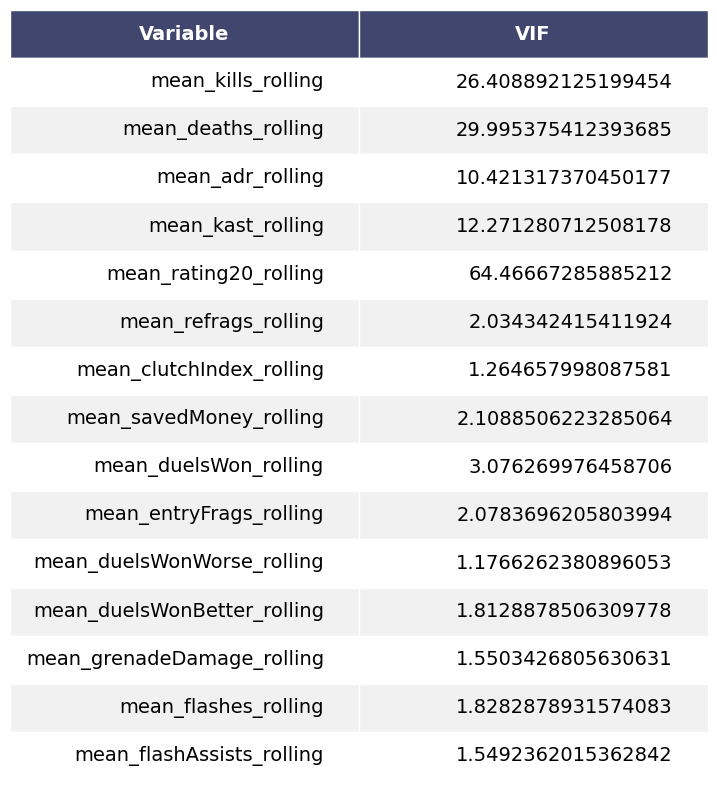

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = no_index[[c for c in no_index.columns if "opponent" not in c and "mean" in c]]
X['intercept'] = 1
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif[vif['Variable']!='intercept']
fig, ax = render_mpl_table(vif)
fig.savefig("vif.svg")

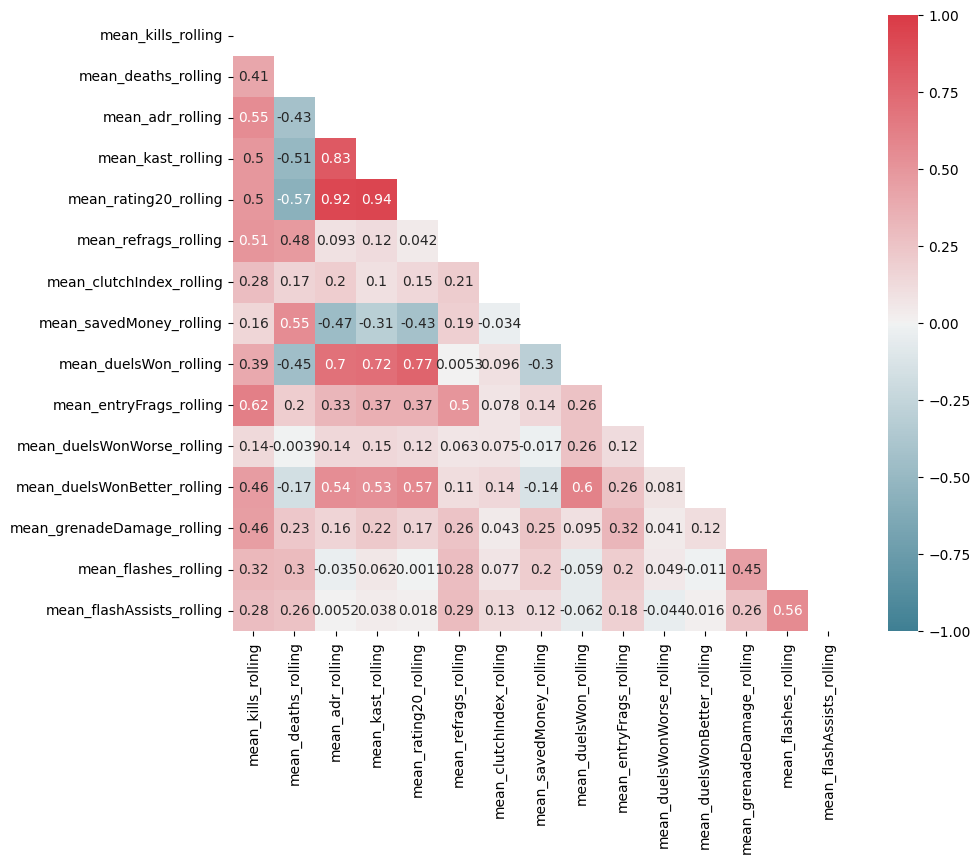

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = no_index[[c for c in no_index.columns if "opponent" not in c and "mean" in c]].corr()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, mask=mask, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
f.savefig("corr.svg")

In [179]:
correlation = [
#     "kast",
#     "rating20",
    "deaths",
    "kills"
]

In [197]:
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

def normalize(X_train, X_test):
    scaler = preprocessing.StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test)  
    return X_train, X_test

def measure(labels, model):
    X = no_index[labels].copy(deep=True)
    Y = no_index['win'].copy(deep=True)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
    X_train, X_test = normalize(X_train, X_test)
    model.fit(X_train, y_train)

    return model.score(X_test, y_test), permutation_importance(model, X_test, y_test, random_state=0)

def correlated(x):
    return any([c in x for c in correlation])

def tune(model, labels, params):
    X = no_index[labels].copy(deep=True)
    Y = no_index['win'].copy(deep=True)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
    X_train, X_test = normalize(X_train, X_test)
    
    grid_search = GridSearchCV(model, params)
    
    grid_search.fit(X_train, y_train)
    
    return grid_search
    

labels = {
    'Rating 2.0': [c for c in no_index.columns if "rolling" in c and "rating20" in c and "mean" not in c],
    "Pełny zbiór statystyk": [c for c in no_index.columns if not correlated(c) and ("rolling" in c and "rating20" not in c and "mean" not in c) or "winratio" in c],
    "Ratios": [c for c in no_index.columns if "winratio" in c],
    "Zbiór ze statystykami uśrednionymi": [c for c in no_index.columns if not correlated(c) and ("rolling" in c and "rating20" not in c and "player" not  in c) or "winratio" in c],
    "HLTV": [c for c in no_index.columns if "rolling" in c and ("kast" in c or "adr" in c or "kills" in c or "deaths" in c or "rating20" in c)]
}

models = {
    'Regresja logistyczna': LogisticRegression(),
    'Las losowy': RandomForestClassifier(n_estimators=300),
    'Naiwny klasyfikator bayesowski': GaussianNB(),
    'SVC': LinearSVC(),
    'Drzewo decyzyjne': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(15)
}

In [200]:
gs1 = tune(RandomForestClassifier(), labels["Zbiór ze statystykami uśrednionymi"], {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400]})
gs2 = tune(KNeighborsClassifier(), labels["Zbiór ze statystykami uśrednionymi"], {"n_neighbors": [5,7,9,11,13,15,17,19]})

In [202]:
gs2.best_params_

{'n_neighbors': 13}


### Classification
Rating 2.0, Regresja logistyczna: 0.5461165048543689
Rating 2.0, Las losowy: 0.6067961165048543
Rating 2.0, Naiwny klasyfikator bayesowski: 0.5679611650485437
Rating 2.0, SVC: 0.5509708737864077
Rating 2.0, Drzewo decyzyjne: 0.5364077669902912


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Rating 2.0, kNN: 0.5922330097087378
Pełny zbiór statystyk, Regresja logistyczna: 0.558252427184466
Pełny zbiór statystyk, Las losowy: 0.587378640776699
Pełny zbiór statystyk, Naiwny klasyfikator bayesowski: 0.5946601941747572


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pełny zbiór statystyk, SVC: 0.5533980582524272
Pełny zbiór statystyk, Drzewo decyzyjne: 0.5121359223300971
Pełny zbiór statystyk, kNN: 0.5558252427184466
Ratios, Regresja logistyczna: 0.529126213592233
Ratios, Las losowy: 0.5631067961165048
Ratios, Naiwny klasyfikator bayesowski: 0.5097087378640777
Ratios, SVC: 0.5218446601941747
Ratios, Drzewo decyzyjne: 0.5364077669902912
Ratios, kNN: 0.5412621359223301
Zbiór ze statystykami uśrednionymi, Regresja logistyczna: 0.5703883495145631
Zbiór ze statystykami uśrednionymi, Las losowy: 0.5995145631067961
Zbiór ze statystykami uśrednionymi, Naiwny klasyfikator bayesowski: 0.587378640776699


/var/folders/_h/f_0v9_wn5xz1nkf88gc7k7hr0000gn/T/ipykernel_18005/2901897383.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Zbiór ze statystykami uśrednionymi, SVC: 0.5655339805825242
Zbiór ze statystykami uśrednionymi, Drzewo decyzyjne: 0.5364077669902912
Zbiór ze statystykami uśrednionymi, kNN: 0.5825242718446602
HLTV, Regresja logistyczna: 0.5606796116504854
HLTV, Las losowy: 0.5364077669902912
HLTV, Naiwny klasyfikator bayesowski: 0.5849514563106796


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


HLTV, SVC: 0.5606796116504854
HLTV, Drzewo decyzyjne: 0.4854368932038835
HLTV, kNN: 0.558252427184466


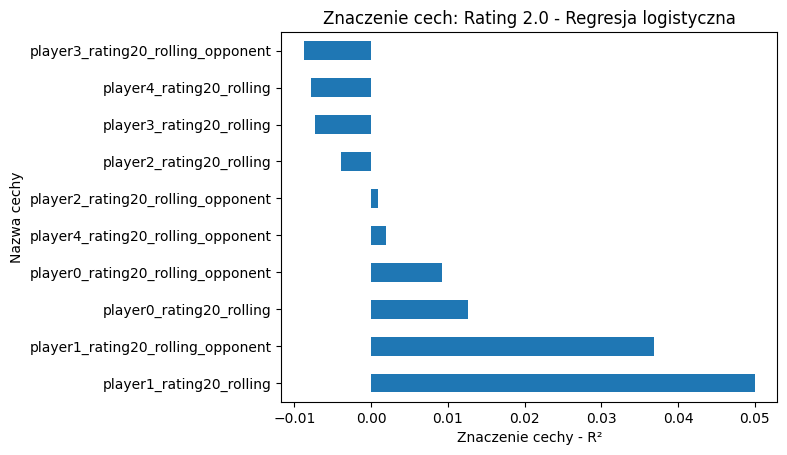

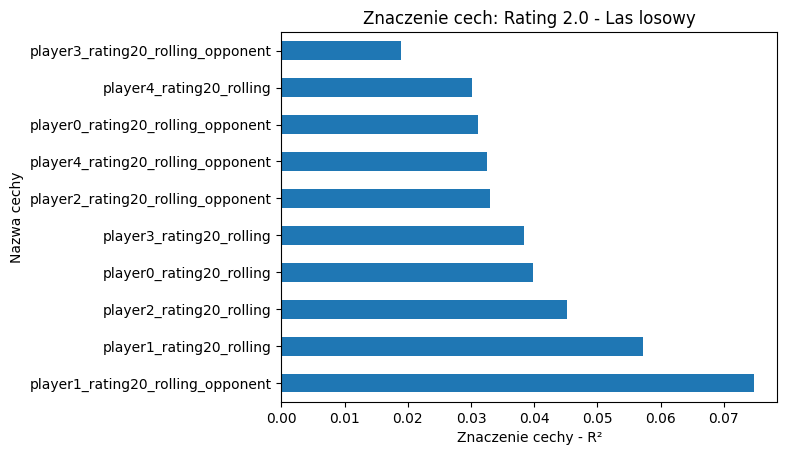

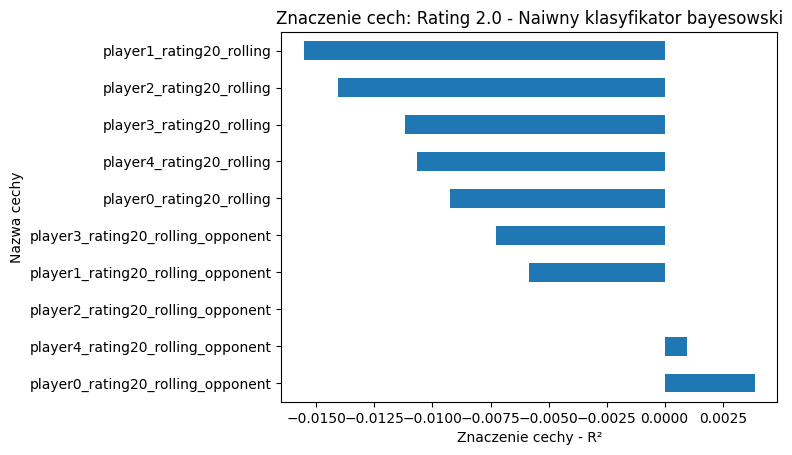

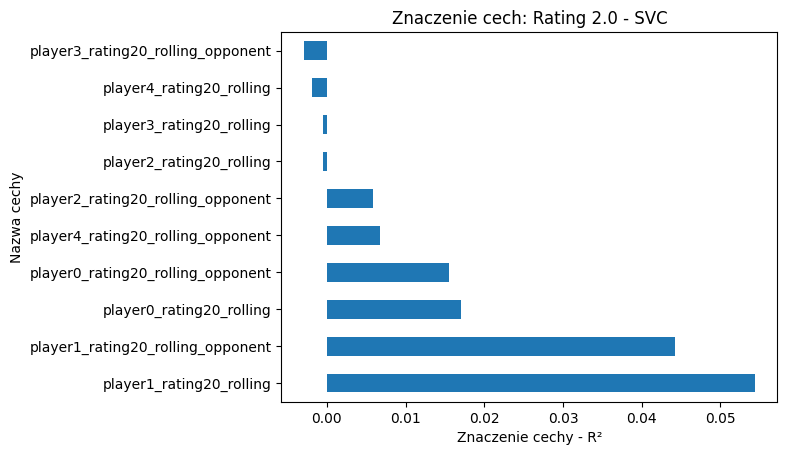

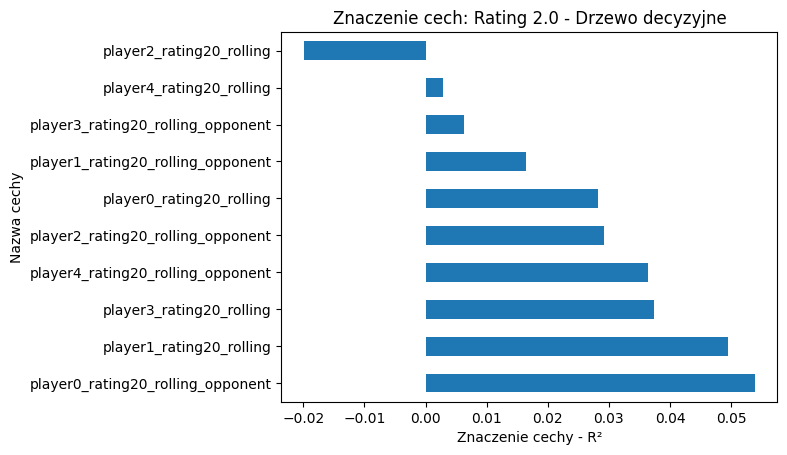

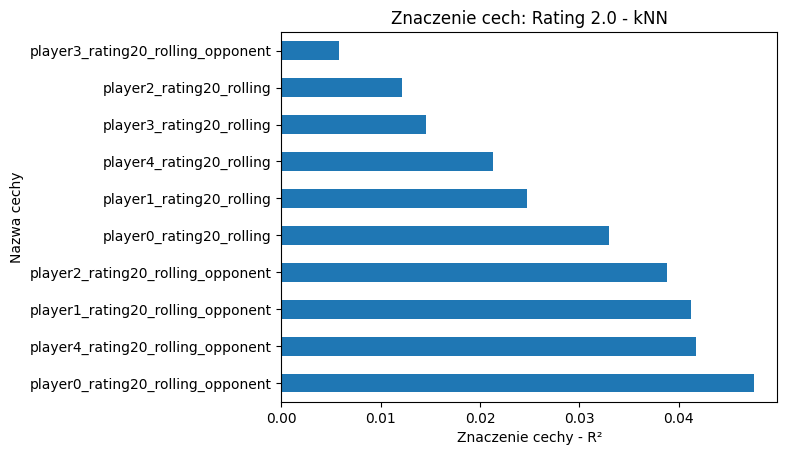

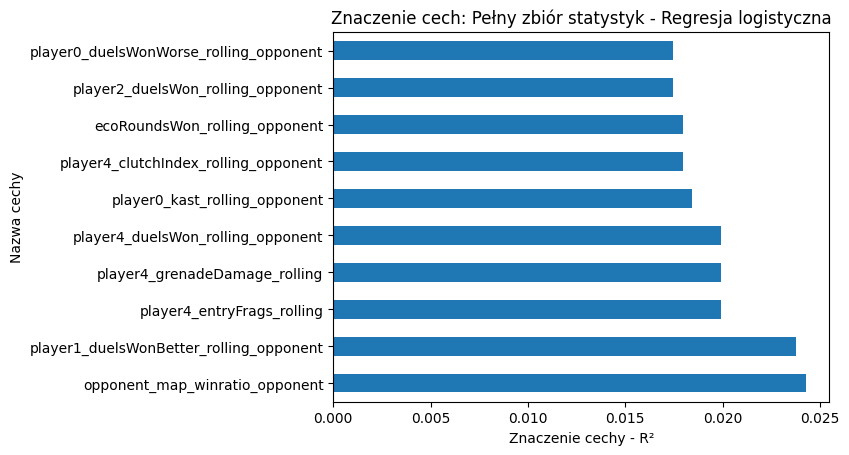

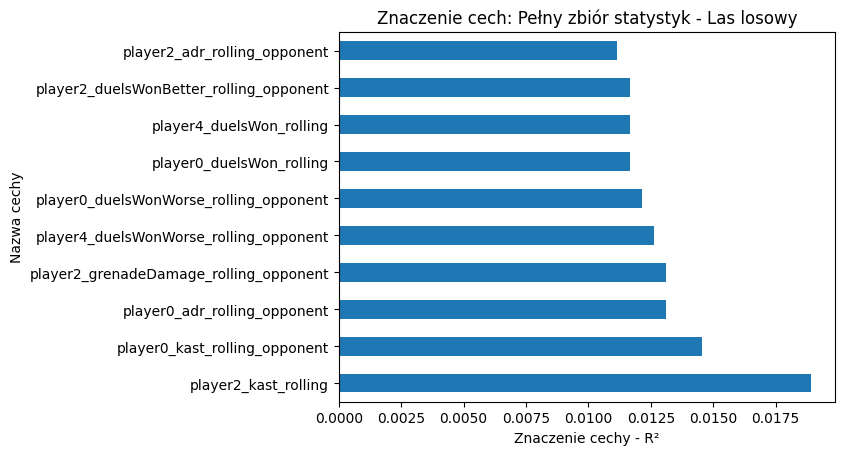

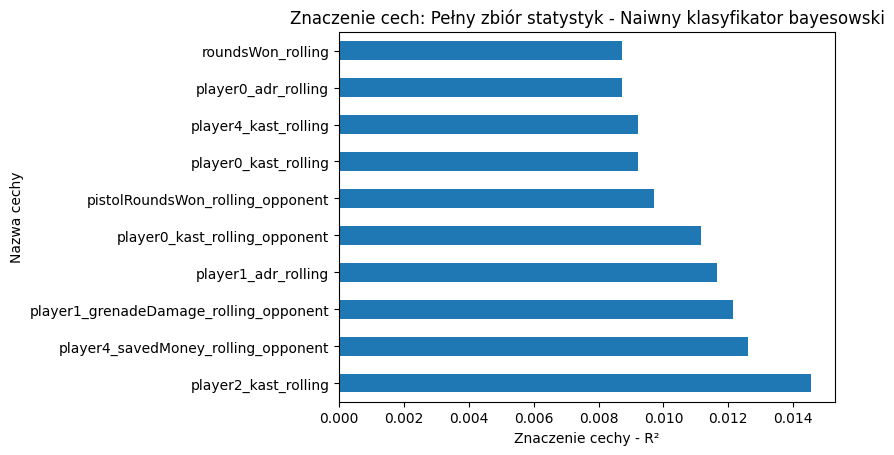

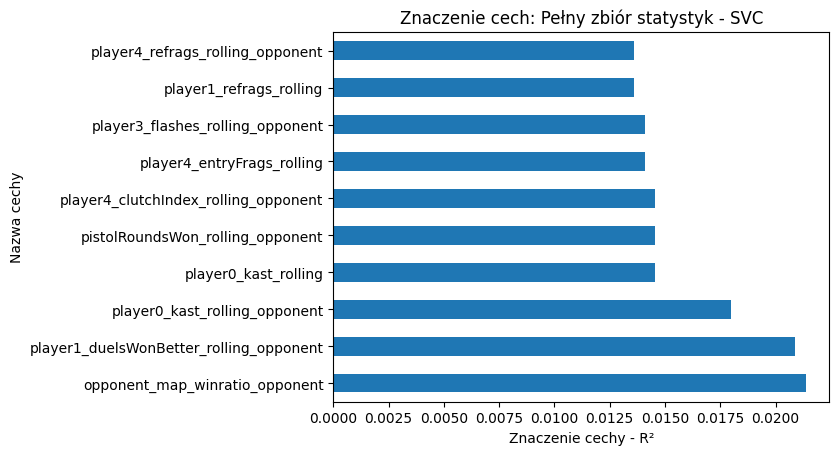

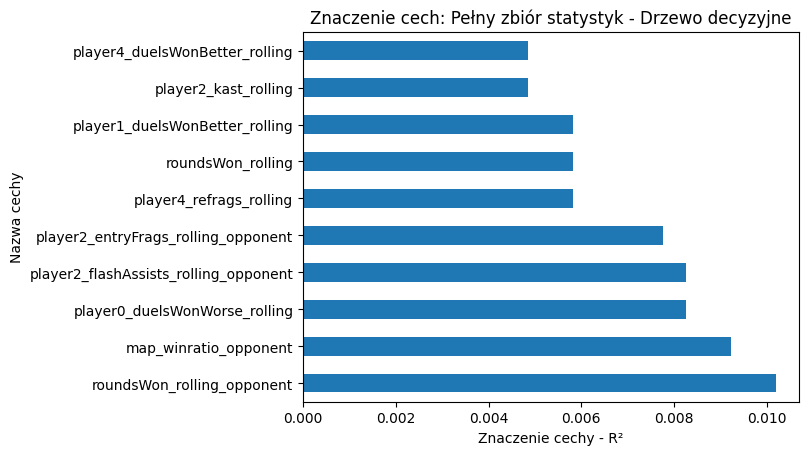

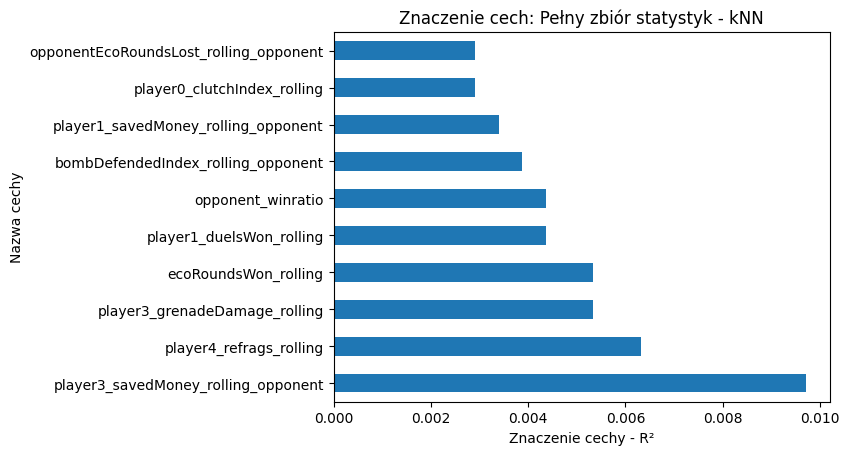

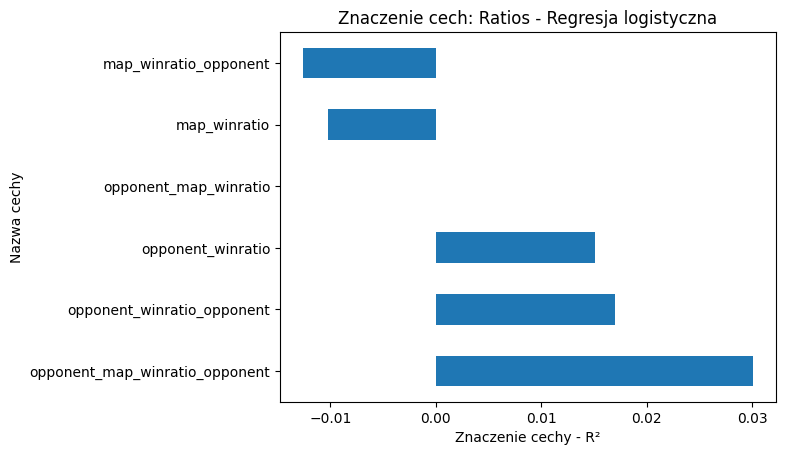

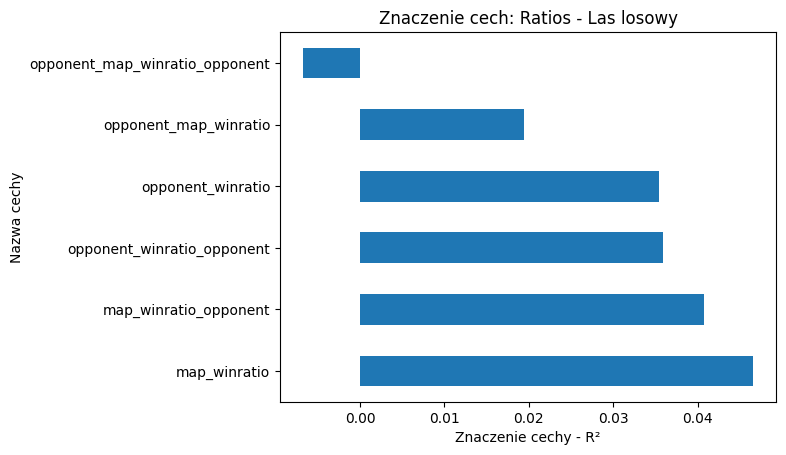

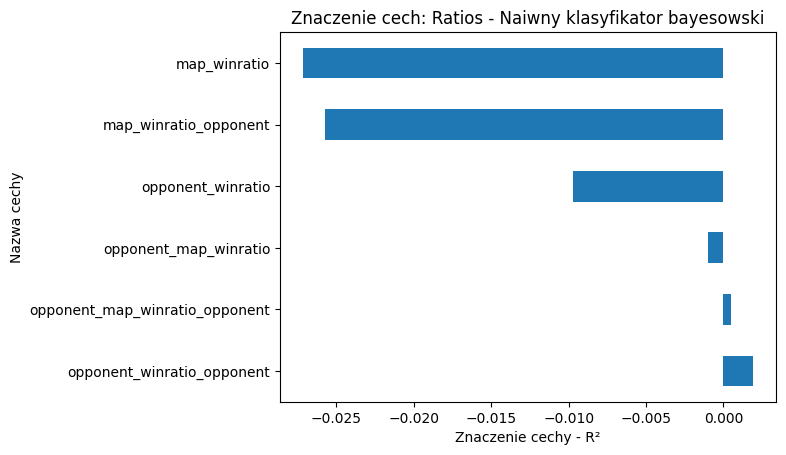

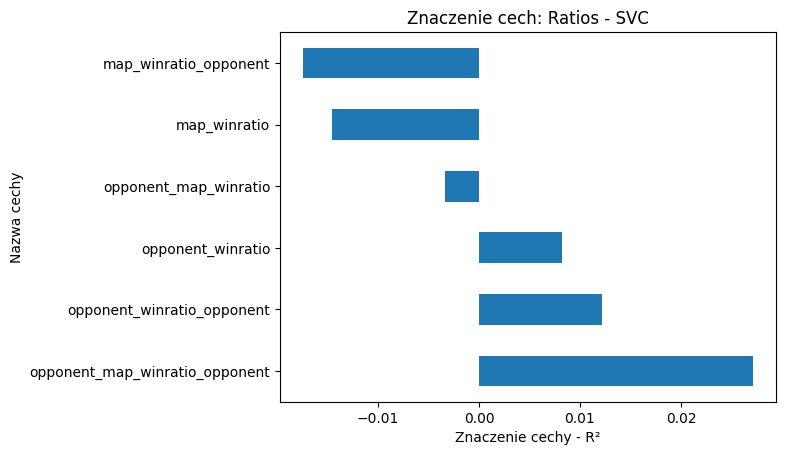

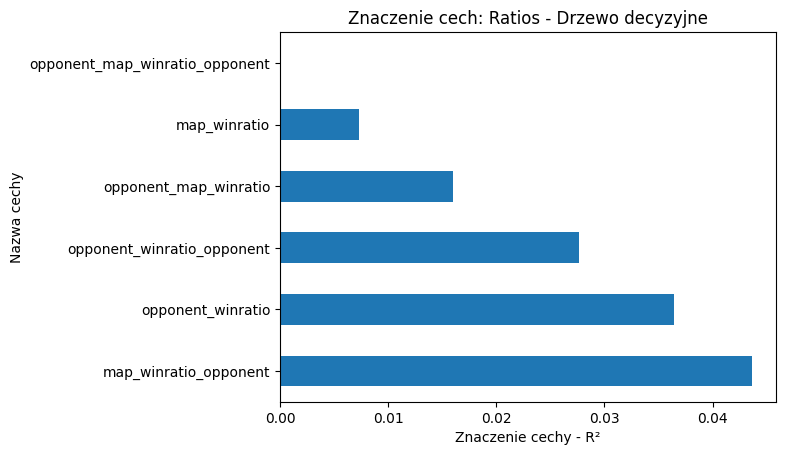

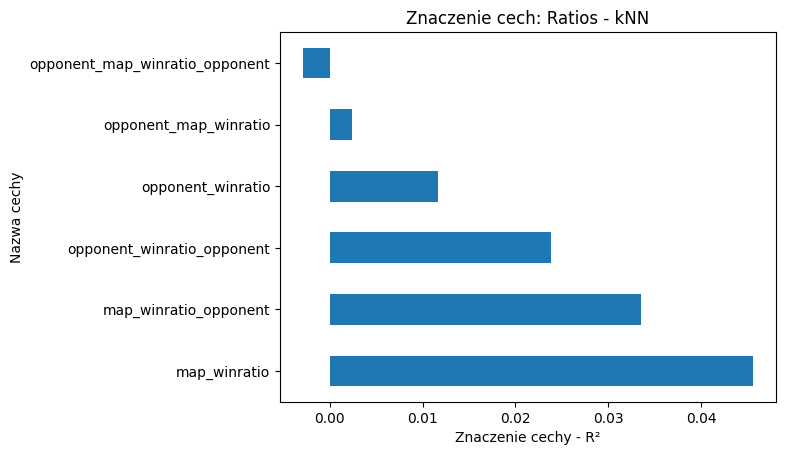

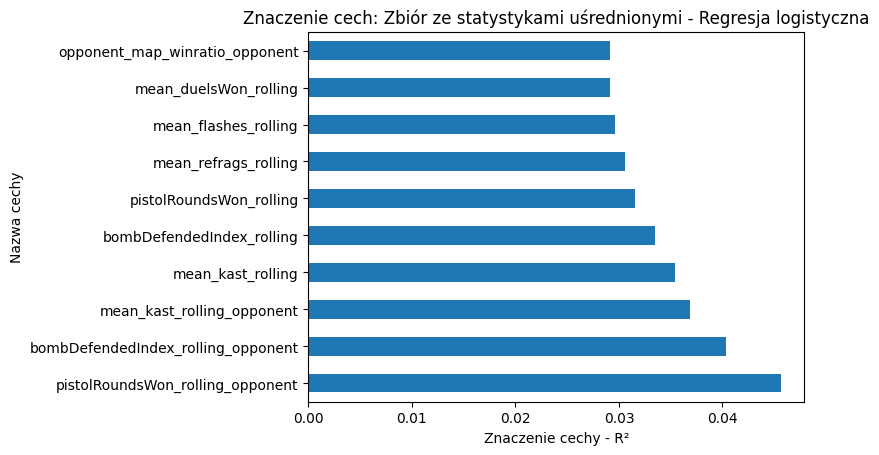

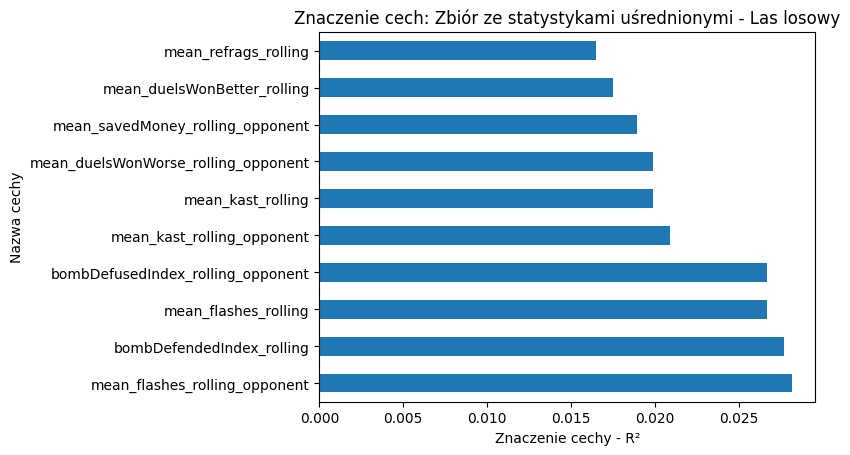

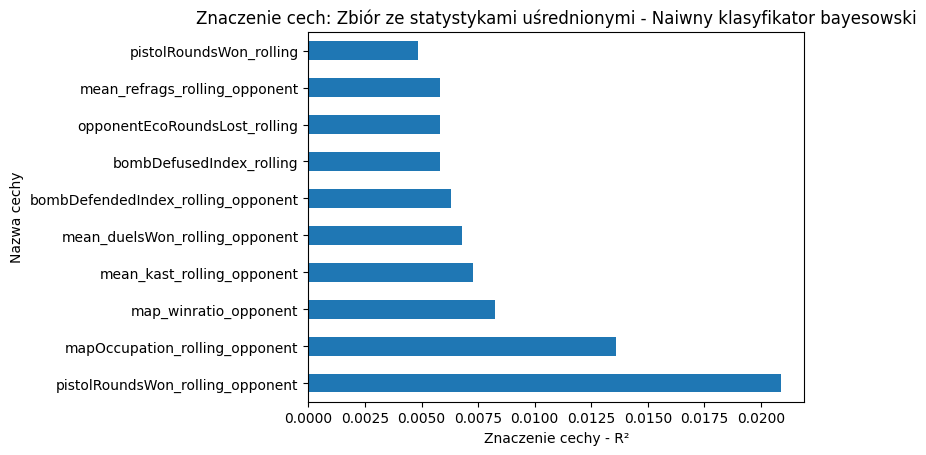

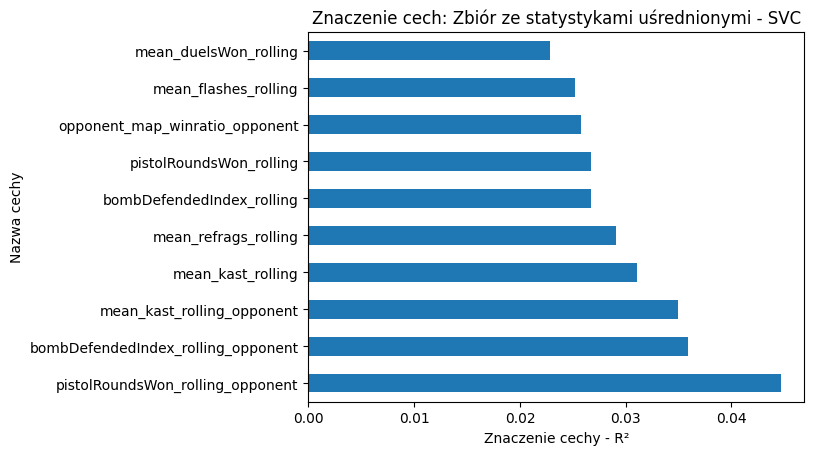

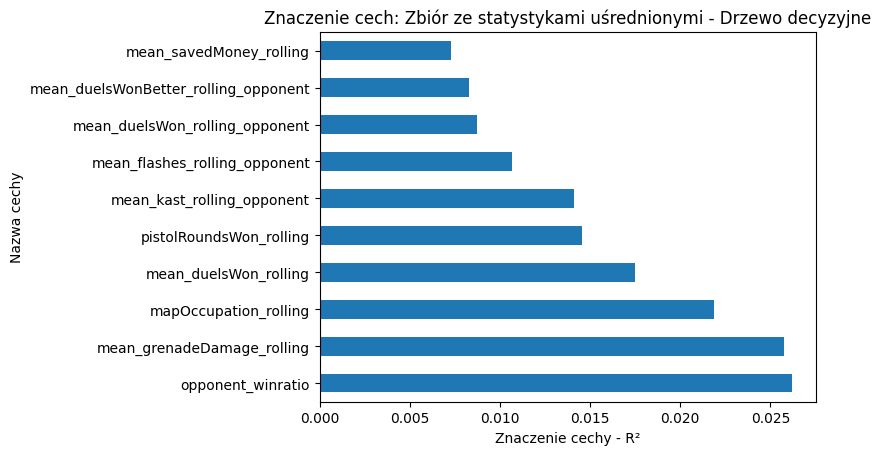

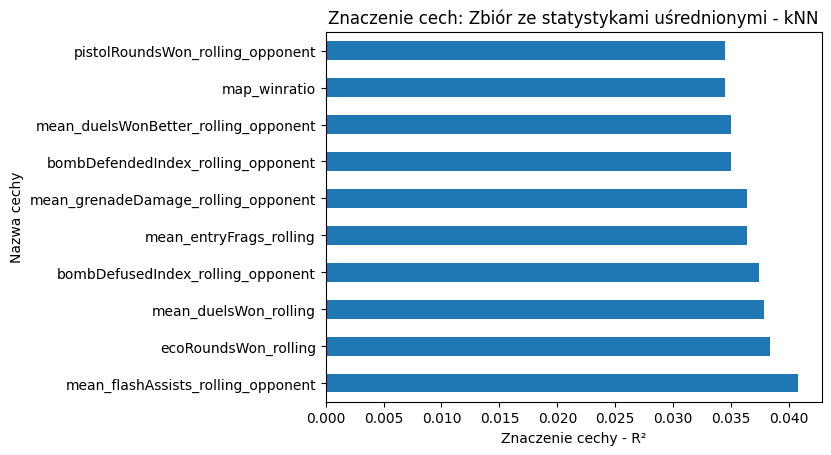

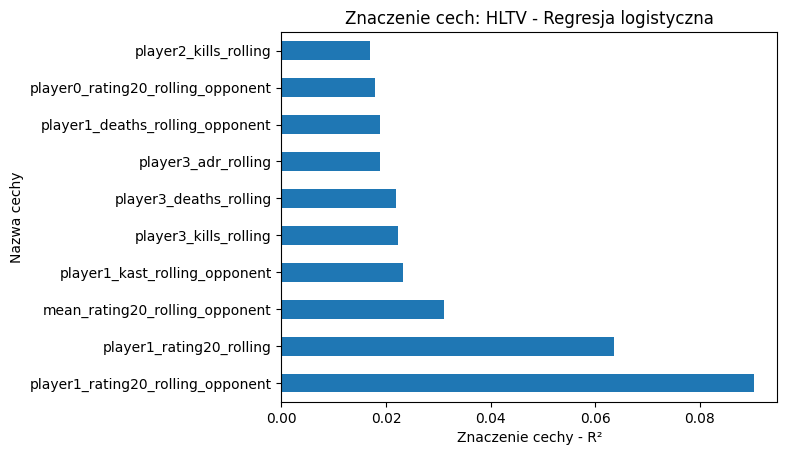

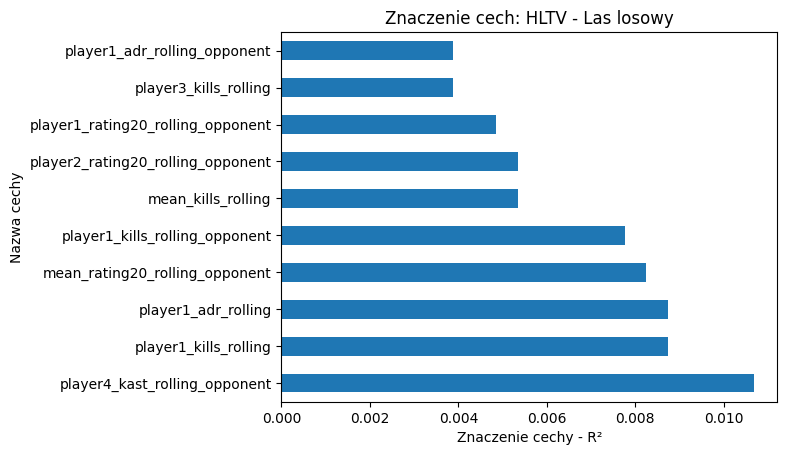

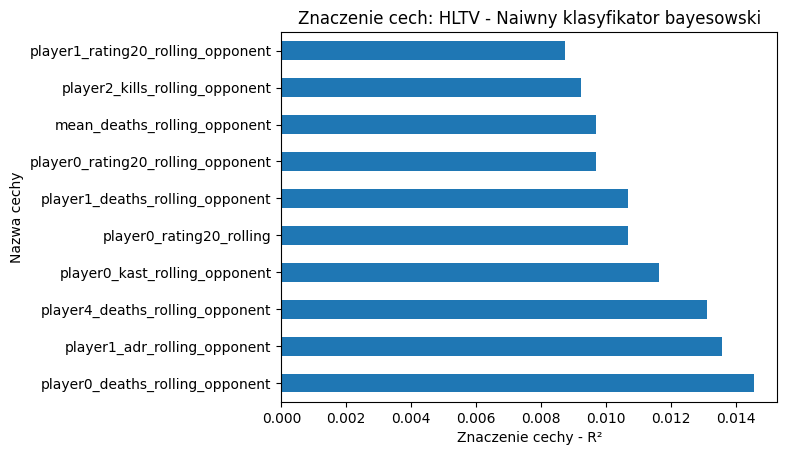

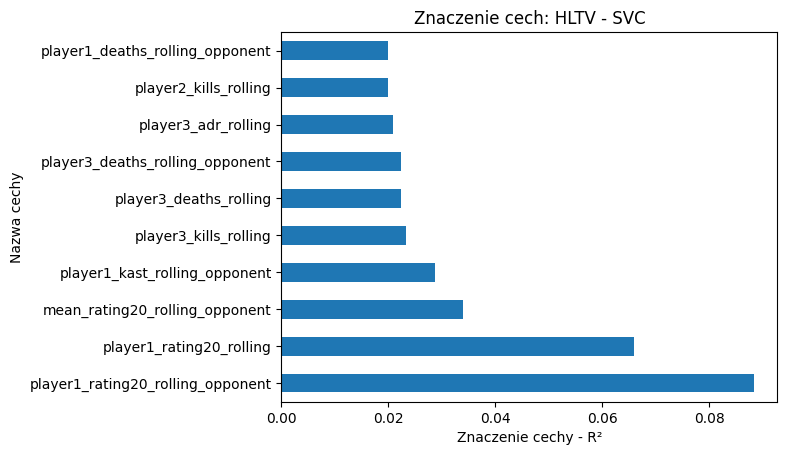

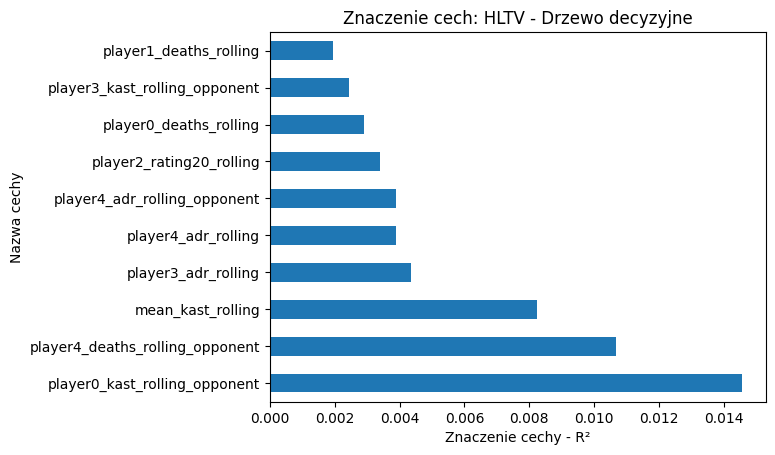

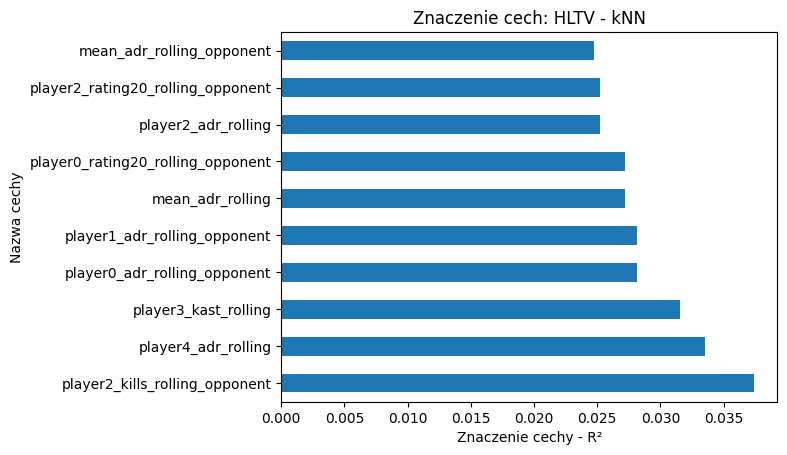

In [194]:
print()
print("### Classification")
k = 0
for i, (label_name, label_value) in enumerate(labels.items()):
    for j, (model_name, model_value) in enumerate(models.items()):
        v, r = measure(label_value, model_value)
        print("{}, {}: {}".format(label_name, model_name, v))
        try:
            fig, ax = plt.subplots()
            feat_importances = pd.Series(r.importances_mean, index=label_value)
            feat_importances.nlargest(10).plot(kind='barh', ax=ax)
            ax.set_title("Znaczenie cech: " + label_name + " - " + model_name)
            ax.set_ylabel("Nazwa cechy")
            ax.set_xlabel("Znaczenie cechy - R\u00b2")
            k = k + 1
            fig.savefig('ax{}_figure.svg'.format(k))
#             for i in r.importances_mean.argsort()[::-1]:
#                 if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#                     print(f"{labels[label_name][i]:<8}"
#                         f"{r.importances_mean[i]:.3f}"
#                         f" +/- {r.importances_std[i]:.3f}")
        except AttributeError:
            None

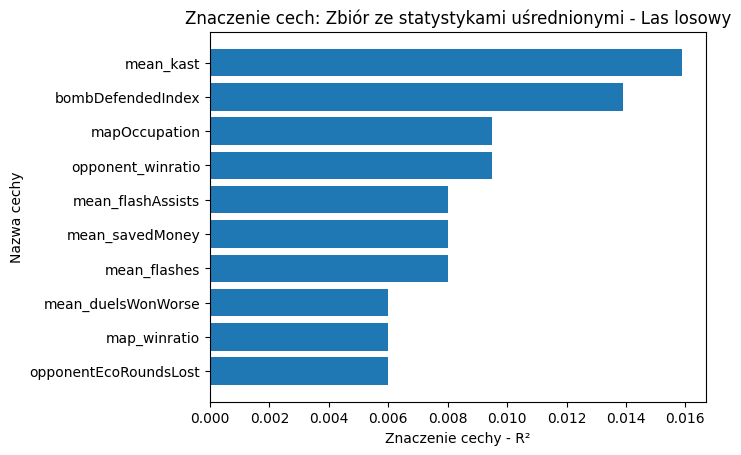

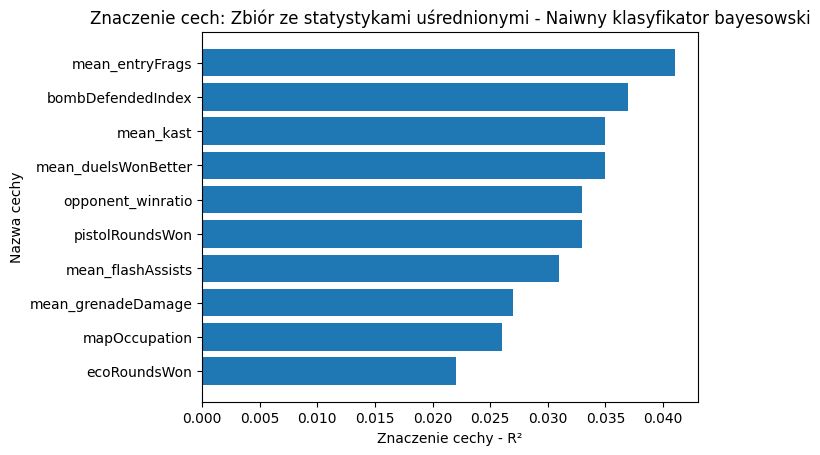

In [170]:
random_forest = {
    "opponentEcoRoundsLost": 0.006,
    "map_winratio": 0.006,
    "mean_duelsWonWorse": 0.006,
    "mean_flashes": 0.008,
    "mean_savedMoney": 0.008,
    "mean_flashAssists": 0.008,
    "opponent_winratio": 0.0095,
    "mapOccupation": 0.0095,
    "bombDefendedIndex": 0.0139,
    "mean_kast": 0.0159
}

nb = {
    "ecoRoundsWon": 0.022,
    "mapOccupation": 0.026,
    "mean_grenadeDamage": 0.027,
    "mean_flashAssists": 0.031,
    "pistolRoundsWon": 0.033,
    "opponent_winratio": 0.033,
    "mean_duelsWonBetter": 0.035,
    "mean_kast": 0.035,
    "bombDefendedIndex": 0.037,
    "mean_entryFrags": 0.041
}

fig, ax = plt.subplots()
plt.barh(range(len(random_forest)), list(random_forest.values()))
ax.set_title("Znaczenie cech: " + "Zbiór ze statystykami uśrednionymi" + " - " + "Las losowy")
ax.set_ylabel("Nazwa cechy")
ax.set_xlabel("Znaczenie cechy - R\u00b2")
ax.set_yticks(range(len(random_forest)), list(random_forest.keys()))
k = k + 1
fig.savefig('feature_importance.svg'.format(k))

fig, ax = plt.subplots()
plt.barh(range(len(nb)), list(nb.values()))
ax.set_title("Znaczenie cech: " + "Zbiór ze statystykami uśrednionymi" + " - " + "Naiwny klasyfikator bayesowski")
ax.set_ylabel("Nazwa cechy")
ax.set_xlabel("Znaczenie cechy - R\u00b2")
ax.set_yticks(range(len(nb)), list(nb.keys()))
k = k + 1
fig.savefig('feature_importance2.svg'.format(k))

# Neural networks

In [171]:
from keras import *
from keras.layers import *
def build_mean_model(verbose=False):
    n_features_rolling = len([c for c in no_index.columns if ("rolling" in c and "rating20" not in c and not "player" in c)])
    n_features_rest = len([c for c in no_index.columns if "winratio" in c])
    inputsA = Input(shape=(MATCHES_NUMBER, n_features_rolling))
    inputsB = Input(shape=(n_features_rest))
    output2 = Dense(1, activation="sigmoid")(inputsB)
#     output = TimeDistributed(Dense(16, activation="relu"))(inputsA)
    output = LSTM(10, activation="sigmoid")(inputsA)
    output = Dropout(0.5)(output)
    output = concatenate([output, output2])
    output = Dense(1, activation="sigmoid")(output)
    model = Model(inputs=[inputsA, inputsB], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    if verbose:
        print(model.output_shape)
        print(n_features_rolling)
        print(n_features_rest)
        print(model.summary())
    return model
    
model = build_mean_model(verbose=True)


    

(None, 1)
42
6
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 42)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10)           2120        ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dropout (Dropout)              (None, 10)           0           ['lstm[0][0]']                   
                                                                               

In [172]:
from sklearn import preprocessing
to_filter = [
    "name",
    "date",
    "mean_adr",
    "mean_savedMoney",
    "mean_duelsWon",
    "mean_duelsWonWorse",
    "mean_duelsWonBetter",
    "mean_grenadeDamage",
    "mapOccupation",
    "bombDefendedIndex",
    "bombDefusedIndex",
    "mean_kills",
    "mean_deaths",
    "mean_kast",
    "mean_refrags",
    "mean_clutchIndex",
    "mean_flashes",
    "mean_flashAssists",
    "roundsWon",
    "opponentEcoRoundsLost",
    "ecoRoundsWon",
    "pistolRoundsWon",
    "mean_entryFrags",
]



filtered_sorted = sorted.loc[:, sorted.columns.isin(to_filter)]
mean_not_rolled_data = [
                        [get_previous_matches(filtered_sorted, row["name"], row["date"]),
                         get_previous_matches(filtered_sorted, row["name_opponent"], row["date_opponent"])]
                        for i, row in no_index.iterrows()
                       ]

for df_list in mean_not_rolled_data:
    df_list[0].pop("name")
    df_list[0].pop("date")
    df_list[1].pop("name")
    df_list[1].pop("date")
merged = [
          pd.concat([
                     df_list[0].reset_index(drop=True), df_list[1].reset_index(drop=True).add_suffix("_opponent")
                    ], axis=1) for df_list in mean_not_rolled_data
         ]

winratio_data = no_index.filter(like="winratio").to_numpy()
lstm_data = np.array([df.to_numpy() for df in merged])
Y_data = no_index["win"].to_numpy()

for i in range(lstm_data.shape[1]):
    scaler = preprocessing.StandardScaler()
    lstm_data[:, i, :] = scaler.fit_transform(lstm_data[:, i, :])

# def prepare_data():
#     return train_test_split(lstm_data, winratio_data, Y_data, shuffle=False, test_size=0.2)
#     LSTM_train, LSTM_test, winratio_train, winratio_test, y_train, y_test = 

In [173]:
lstm_data = tf.convert_to_tensor(lstm_data)
Y_data = tf.convert_to_tensor(Y_data)
winratio_data = tf.convert_to_tensor(winratio_data)

In [174]:
print(winratio_data.shape)
print(lstm_data.shape)
print(Y_data.shape)
print(np.argwhere(np.isnan(lstm_data)))

(2060, 6)
(2060, 5, 42)
(2060,)
[]


In [175]:
def run_training(verbose=False, epochs=200):
    model = build_mean_model()
#     model = keras.models.load_model("timedistributeddense16_lstm10_5matches_model")
#     model = keras.models.load_model("lstm10_model")
    if verbose:
        return model.fit([lstm_data, winratio_data], Y_data, epochs=epochs, batch_size=64, validation_split=0.05)
    else:
        return model.fit([lstm_data, winratio_data], Y_data, epochs=epochs, batch_size=64, validation_split=0.05, verbose=False)

In [176]:
import matplotlib.ticker as mtick
def plot_hist(hist):
    plt.rcParams["figure.figsize"] = (6.4,4.8)
    fig, axs = plt.subplots(2)
    fig.subplots_adjust(hspace=0.6)
    fig.set_figheight(6)    
    axs[0].set_title("Wartość funkcji błędu w danej epoce")
    axs[0].plot(np.array(hist.history["val_loss"]) * 100)
    axs[0].plot(np.array(hist.history["loss"]) * 100)
    axs[0].legend(["Zbiór walidacyjny", "Zbiór treningowy"])
    axs[0].set_ylabel("Wartość funkcji błędu")
    axs[0].set_xlabel("Numer epoki")

    axs[1].set_title("Dokładność predykcji w danej epoce")
    axs[1].plot(np.array(hist.history["val_accuracy"]) * 100)
    axs[1].plot(np.array(hist.history["accuracy"]) * 100)
    axs[1].legend(["Zbiór walidacyjny", "Zbiór treningowy"])
    axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[1].set_ylabel("Dokładność predykcji [%]")
    axs[1].set_xlabel("Numer epoki")

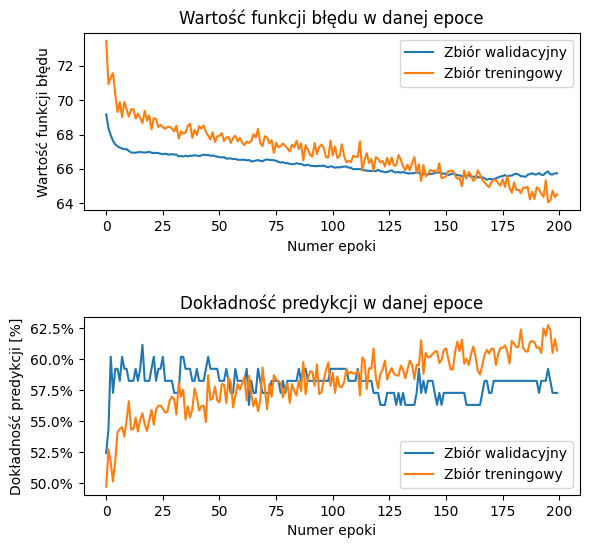

In [178]:
hist = run_training()
plot_hist(hist)

In [153]:
import matplotlib.ticker as mtick
def save_loss_hist(filename, hist):
    plt.rcParams["figure.figsize"] = (6.4,4.8)
    fig, axs = plt.subplots()
#     fig.subplots_adjust(hspace=0.6)
#     fig.set_figheight(6)    
    axs.set_title("Wartość funkcji błędu w danej epoce")
    axs.plot(np.array(hist.history["val_loss"]) * 100)
    axs.plot(np.array(hist.history["loss"]) * 100)
    axs.legend(["Zbiór walidacyjny", "Zbiór treningowy"])
    axs.set_ylabel("Wartość funkcji błędu")
    axs.set_xlabel("Numer epoki")
    fig.savefig(filename + ".svg")

#     axs[0].set_title("Dokładność predykcji w danej epoce")
#     axs[0].plot(np.array(hist.history["val_accuracy"]) * 100)
#     axs[0].plot(np.array(hist.history["accuracy"]) * 100)
#     axs[0].legend(["Zbiór walidacyjny", "Zbiór treningowy"])
#     axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
#     axs[0].set_ylabel("Dokładność predykcji [%]")
#     axs[0].set_xlabel("Numer epoki")

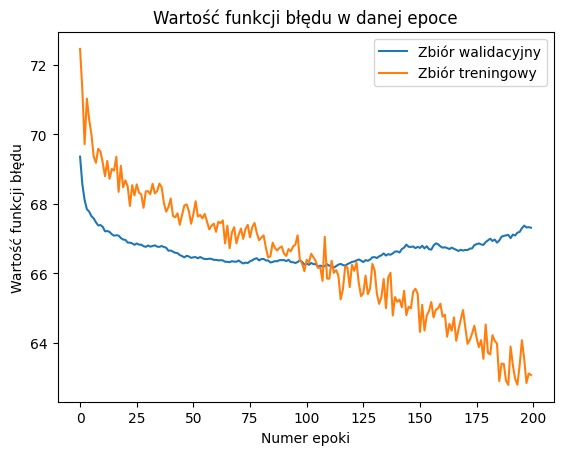

In [162]:
save_loss_hist("epochs_nn1", hist)

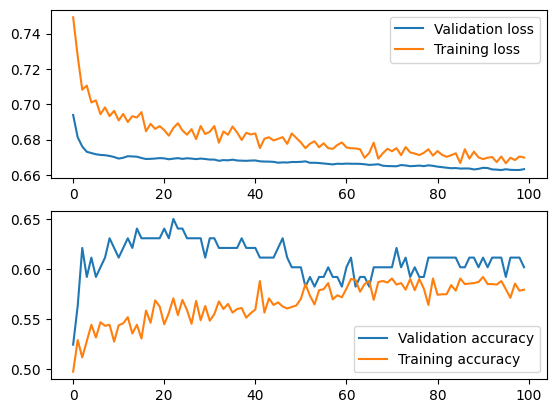

In [209]:
hist = run_training(epochs=100)
plot_hist(hist)

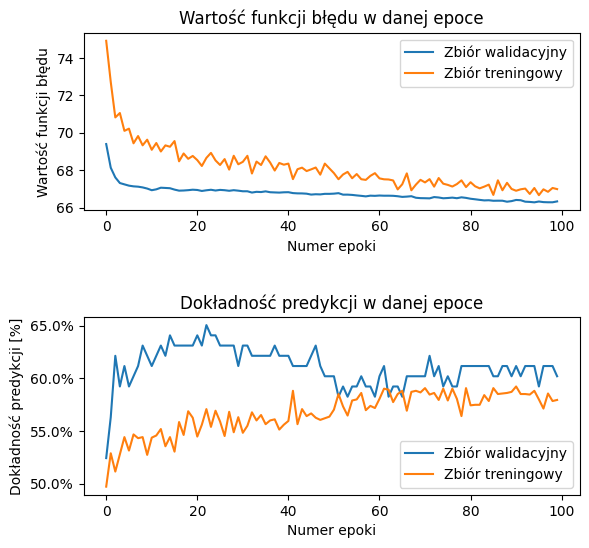

In [276]:
plot_hist(hist)

In [210]:
hist.history["val_accuracy"][-1]

0.6019417643547058

## LSTM10
'loss': 0.6670538157224655,

'accuracy': 0.592488506436348,

'val_loss': 0.6727890610694885,

'val_accuracy': 0.5640776723623275

## LSTM10 + ReLU4 after Dropout
'loss': 0.6655876487493515,

'accuracy': 0.5946601986885071,

'val_loss': 0.6695623457431793,

'val_accuracy': 0.5597087413072586

## LSTM12
'loss': 0.6626771271228791,

'accuracy': 0.5985181361436844,

'val_loss': 0.6679573774337768,

'val_accuracy': 0.5669902950525284

## LSTM12 + ReLU4 after Dropout
'loss': 0.6649885922670364,

'accuracy': 0.5957332640886307,

'val_loss': 0.6707679033279419,

'val_accuracy': 0.5708737850189209

## LSTM14 + ReLU4 after Dropout
'loss': 0.6627978593111038,

'accuracy': 0.5989269286394119,

'val_loss': 0.669986343383789,

'val_accuracy': 0.5611650496721268

# LSTM18 + LSTM4(tanh)
'loss': 0.6364479750394821,

'accuracy': 0.6407000452280045,

'val_loss': 0.6815859407186509,

'val_accuracy': 0.5470873832702636

In [184]:
lstm10 = keras.models.load_model("timedistributeddense16_lstm10_model")

In [185]:
lstm10.summary()

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_75 (InputLayer)          [(None, 3, 42)]      0           []                               
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 16)       688         ['input_75[0][0]']               
 buted)                                                                                           
                                                                                                  
 lstm_46 (LSTM)                 (None, 10)           1080        ['time_distributed_3[0][0]']     
                                                                                                  
 input_76 (InputLayer)          [(None, 6)]          0           []                        

In [143]:
mean_results = {
    "Regresja logistyczna": 62.13,
    "Las losowy": 60.19,
    "Naiwny klasyfikator bayesowski": 66.01,
    "SVC": 62.13,
    "Drzewo decyzyjne": 53.39,
    "kNN": 60.19,
    "Sieć neuronowa 1": 60.19,
    "Sieć neuronowa 2": 62.13
}

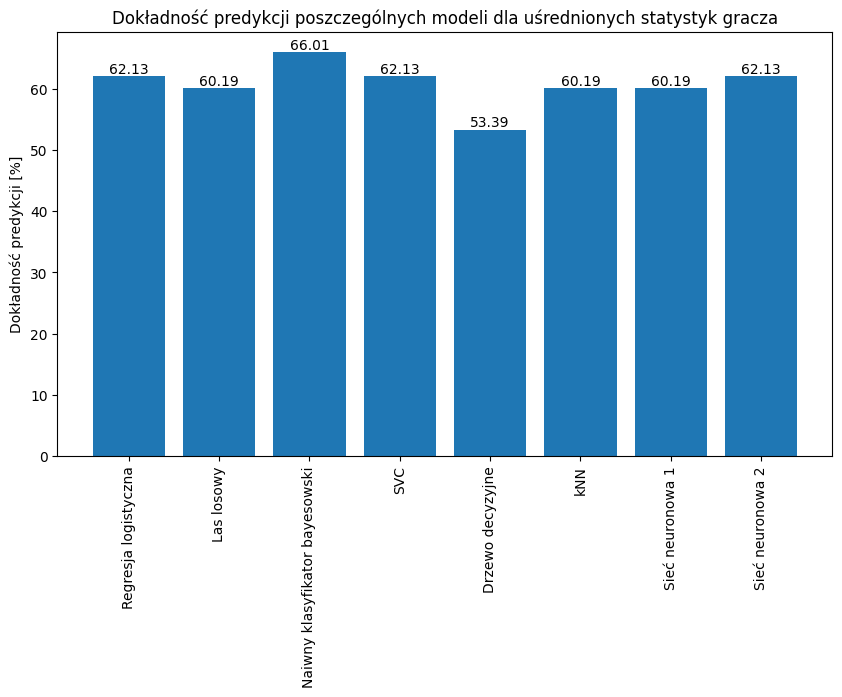

In [144]:
fig, ax = plt.subplots(figsize=(10,5.5))
ax.bar(range(len(mean_results)), list(mean_results.values()), align='center')
ax.set_xticks(range(len(mean_results)), list(mean_results.keys()), rotation=90)
ax.set_ylabel("Dokładność predykcji [%]")
ax.set_title("Dokładność predykcji poszczególnych modeli dla uśrednionych statystyk gracza")

rects = ax.patches

# Make some labels.

for rect, label in zip(rects, list(mean_results.values())):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
        
fig.savefig("results1.svg")

In [316]:
from keras import *
from keras.layers import *
def build_mean_model2(verbose=False):
    n_features_rolling = len([c for c in no_index.columns if ("rolling" in c and "rating20" not in c and not "mean" in c)])
    n_features_rest = len([c for c in no_index.columns if "winratio" in c])
    inputsA = Input(shape=(MATCHES_NUMBER, n_features_rolling))
    inputsB = Input(shape=(n_features_rest))
    output2 = Dense(1, activation="sigmoid")(inputsB)
#     output = TimeDistributed(Dense(32, activation="relu"))(inputsA)
    output = LSTM(10, activation="sigmoid")(inputsA)
    output = Dropout(0.5)(output)
    output = concatenate([output, output2])
    output = Dense(1, activation="sigmoid")(output)
    model = Model(inputs=[inputsA, inputsB], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    if verbose:
        print(model.output_shape)
        print(n_features_rolling)
        print(n_features_rest)
        print(model.summary())
    return model
    
model = build_mean_model(verbose=True)

(None, 1)
154
6
Model: "model_104"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_209 (InputLayer)         [(None, 5, 154)]     0           []                               
                                                                                                  
 time_distributed_88 (TimeDistr  (None, 5, 16)       2480        ['input_209[0][0]']              
 ibuted)                                                                                          
                                                                                                  
 lstm_84 (LSTM)                 (None, 10)           1080        ['time_distributed_88[0][0]']    
                                                                                                  
 input_210 (InputLayer)         [(None, 6)]          0           []       

In [293]:
from sklearn import preprocessing
to_filter = [
    "name",
    "date",
    "mapOccupation",
    "bombDefendedIndex",
    "bombDefusedIndex",
    "roundsWon",
    "opponentEcoRoundsLost",
    "ecoRoundsWon",
    "pistolRoundsWon",
]



filtered_sorted = sorted[[c for c in sorted.columns if (c in to_filter or "player" in c) and "rating20" not in c]]
mean_not_rolled_data = [
                        [get_previous_matches(filtered_sorted, row["name"], row["date"]),
                         get_previous_matches(filtered_sorted, row["name_opponent"], row["date_opponent"])]
                        for i, row in no_index.iterrows()
                       ]

for df_list in mean_not_rolled_data:
    df_list[0].pop("name")
    df_list[0].pop("date")
    df_list[1].pop("name")
    df_list[1].pop("date")
merged = [
          pd.concat([
                     df_list[0].reset_index(drop=True), df_list[1].reset_index(drop=True).add_suffix("_opponent")
                    ], axis=1) for df_list in mean_not_rolled_data
         ]

winratio_data = no_index.filter(like="winratio").to_numpy()
lstm_data = np.array([df.to_numpy() for df in merged])
Y_data = no_index["win"].to_numpy()

for i in range(lstm_data.shape[1]):
    scaler = preprocessing.StandardScaler()
    lstm_data[:, i, :] = scaler.fit_transform(lstm_data[:, i, :])

In [294]:
lstm_data = tf.convert_to_tensor(lstm_data)
Y_data = tf.convert_to_tensor(Y_data)
winratio_data = tf.convert_to_tensor(winratio_data)
print(winratio_data.shape)
print(lstm_data.shape)
print(Y_data.shape)
print(np.argwhere(np.isnan(lstm_data)))

(2060, 6)
(2060, 5, 154)
(2060,)
[]


In [295]:
def run_training2(verbose=False, epochs=200):
    model = build_mean_model2()
    if verbose:
        return model.fit([lstm_data, winratio_data], Y_data, epochs=epochs, batch_size=64, validation_split=0.05)
    else:
        return model.fit([lstm_data, winratio_data], Y_data, epochs=epochs, batch_size=64, validation_split=0.05, verbose=False)

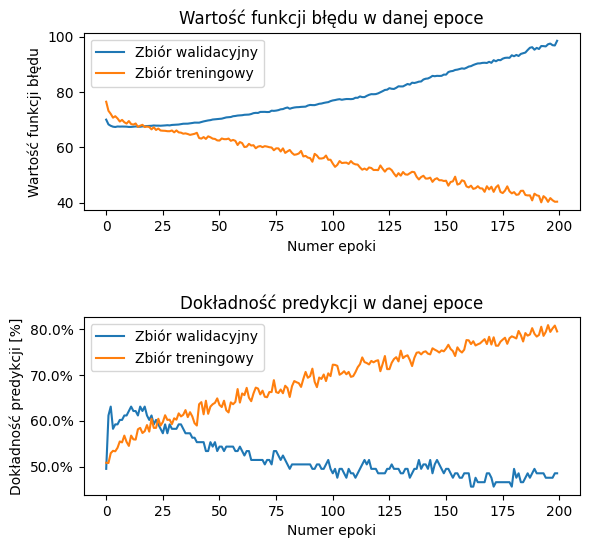

In [317]:
hist = run_training2()
plot_hist(hist)

In [138]:
not_mean_results = {
    "Regresja logistyczna": 57.28,
    "Las losowy": 62.13,
    "Naiwny klasyfikator bayesowski": 62.13,
    "SVC": 56.31,
    "Drzewo decyzyjne": 58.25,
    "kNN": 55.33,
}

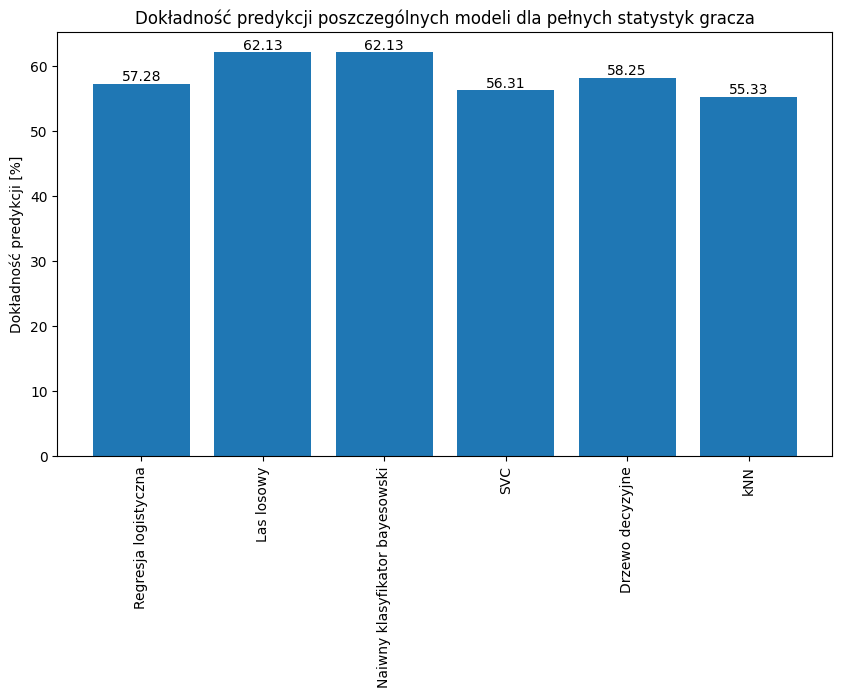

In [139]:
fig, ax = plt.subplots(figsize=(10,5.5))
ax.bar(range(len(not_mean_results)), list(not_mean_results.values()), align='center')
ax.set_xticks(range(len(not_mean_results)), list(not_mean_results.keys()), rotation=90)
ax.set_ylabel("Dokładność predykcji [%]")
ax.set_title("Dokładność predykcji poszczególnych modeli dla pełnych statystyk gracza")

rects = ax.patches

# Make some labels.

for rect, label in zip(rects, list(not_mean_results.values())):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

fig.savefig("results2.svg")

In [2]:
hltv_results = {
    "Regresja logistyczna": 56.06,
    "Las losowy": 54.12,
    "Naiwny klasyfikator bayesowski": 58.49,
    "SVC": 55.58,
    "Drzewo decyzyjne": 45.63,
    "kNN": 55.82
}

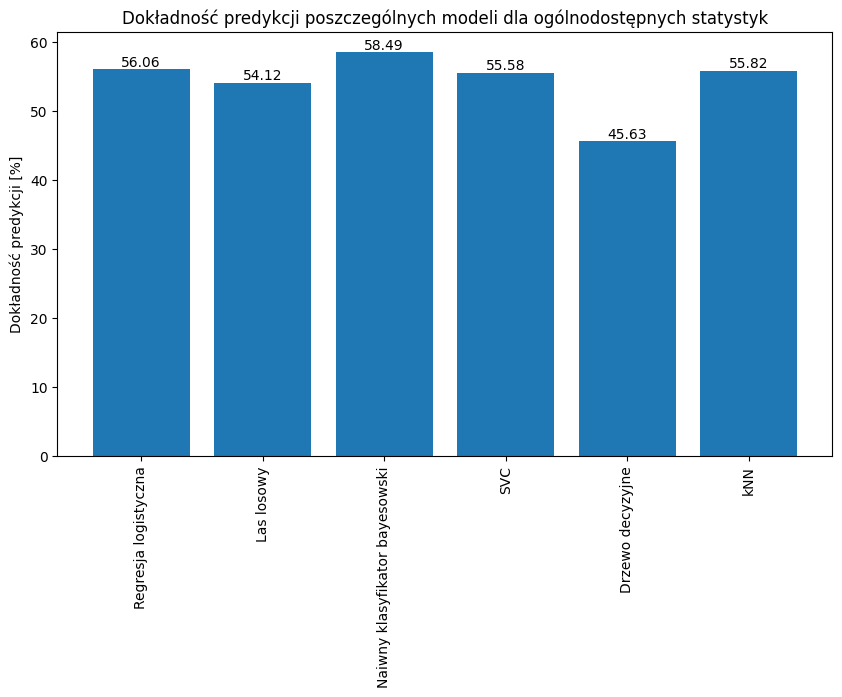

In [136]:
fig, ax = plt.subplots(figsize=(10,5.5))
bars = ax.bar(range(len(hltv_results)), list(hltv_results.values()), align='center')
ax.set_xticks(range(len(hltv_results)), list(hltv_results.keys()), rotation=90)
ax.set_ylabel("Dokładność predykcji [%]")
ax.set_title("Dokładność predykcji poszczególnych modeli dla ogólnodostępnych statystyk")

rects = ax.patches

# Make some labels.

for rect, label in zip(rects, list(hltv_results.values())):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

fig.savefig("results_hltv.svg")